In [24]:
import os
import sklearn
import string
import re
from collections import defaultdict
import matplotlib.pyplot as plt


In [5]:
DATA_FOLDER_PTH=os.path.join(os.getcwd(), os.pardir, 'data')
TRAIN_TEXT_FILE_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/train', 'train_sent_emo.csv')

In [7]:
dataset=pd.read_csv(TRAIN_TEXT_FILE_PTH)
dataset.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


In [12]:
dataset.describe()

,Sr No.,Dialogue_ID,Utterance_ID,Season,Episode
count,9989.000000,9989.000000,9989.00000,9989.000000,9989.000000
mean,5262.373511,526.549304,6.14516,4.853739,12.697467
std,3032.169169,302.464741,4.96027,2.389599,7.220051
min,1.000000,0.000000,0.00000,1.000000,1.000000
25%,2641.000000,261.000000,2.00000,3.000000,6.000000
50%,5267.000000,531.000000,5.00000,5.000000,12.000000
75%,7891.000000,795.000000,9.00000,7.000000,19.000000
max,10478.000000,1038.000000,23.00000,9.000000,25.000000


<AxesSubplot:xlabel='Emotion', ylabel='Count'>

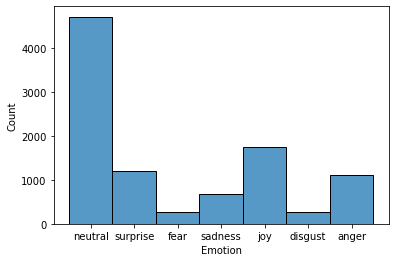

In [10]:
sns.histplot(data=dataset['Emotion'])

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

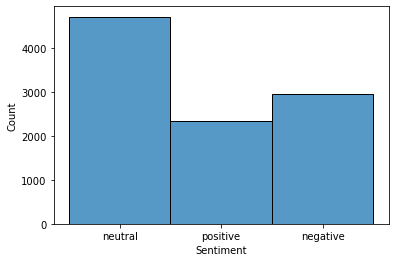

In [9]:
sns.histplot(data=dataset['Sentiment'])

In [14]:
string_list=dataset['Utterance'].tolist()
string_list[:3]

['also I was the point person on my company\x92s transition from the KL-5 to GR-6 system.',
 'You must\x92ve had your hands full.',
 'That I did. That I did.']

In [20]:
line1=string_list[0]
print(line1)
re_print=re.compile('[^%s]' % re.escape(string.printable))
line1=''.join([re_print.sub('',w) for w in line1])
print(line1)

also I was the point person on my companys transition from the KL-5 to GR-6 system.
also I was the point person on my companys transition from the KL-5 to GR-6 system.


In [22]:
re_print=re.compile('[^%s]' % re.escape(string.printable))

normalized_string_list=[]
for string_item in string_list:
    normalized_string=''.join([re_print.sub('',w) for w in string_item])
    normalized_string_list.append(normalized_string)

normalized_string_list[:5]

['also I was the point person on my companys transition from the KL-5 to GR-6 system.',
 'You mustve had your hands full.',
 'That I did. That I did.',
 'So lets talk a little bit about your duties.',
 'My duties?  All right.']

In [25]:
# create seaborn histogram of punctuation from a list of strings
punc_to_count=defaultdict(lambda: 0)
for char in ' '.join(normalized_string_list):
    if char in string.punctuation:
        punc_to_count[char]+=1



In [31]:
for k,v in sorted(punc_to_count.items(), key=lambda x:x[1]):
    print(k,v)

/ 1
* 2
& 2
[ 3
] 3
% 5
( 7
; 10
$ 16
: 40
" 176
- 1123
' 2090
? 2888
! 4267
, 7245
. 7780


<BarContainer object of 17 artists>

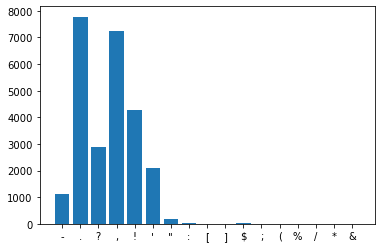

In [30]:
plt.bar(punc_to_count.keys(), punc_to_count.values())

In [32]:
lengths=[len(line) for line in normalized_string_list]
sns.histplot(lengths)

<AxesSubplot:ylabel='Count'>